In [1]:
# Import standard DS libraries
import pandas as pd
import numpy as np
import re

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Note: At some point the values doubled, this dataset has automagically updated all values to 2022 (where max value in double jeopardy is $2000)

In [2]:
# Read csv - note the index_col = 0 and dropping cols
df = pd.read_csv('master_question_list.csv', index_col = 0).drop(columns = 'index')

In [3]:
# Important - REplace NaN answers that are literally 'Null' with the word
df = df.fillna(f'Null')

In [4]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285181 entries, 0 to 285180
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   show_num    285181 non-null  int64 
 1   show_yr     285181 non-null  int64 
 2   show_mo     285181 non-null  object
 3   round       285181 non-null  object
 4   category    285181 non-null  object
 5   value       285181 non-null  object
 6   clue        285181 non-null  object
 7   is_DD       285181 non-null  int64 
 8   answer      285181 non-null  object
 9   is_stumper  285181 non-null  int64 
 10  level       285181 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 26.1+ MB


,show_num,show_yr,show_mo,round,category,value,clue,is_DD,answer,is_stumper,level
142512,6286,2012,January,Jeopardy,THE FOOD CHAIN,400,This company's first Supercenter opened in 1988 & included a grocery & 36 departments of general merchandise,0,Walmart,0,1
64548,4985,2006,April,Double Jeopardy,"""DON'T"" YOU KNOW THIS SONG?",1200,"No doubt you know this ""Tragic Kingdom"" tune was No. 1 for 16 weeks on the airplay chart in 1996 & '97",0,"""Don\'t Speak""",0,2
71644,5104,2006,November,Jeopardy,"THE ILIAD, MACBETH OR THE HOBBIT",800,"After Smaug is killed, the ""Battle of Five Armies"" ensues",0,The Hobbit,0,2
17204,4194,2002,November,Jeopardy,ORIGINAL CRAYOLA COLORS,600,Color for the belly of your sapsucker or a caution card in soccer,0,yellow,0,2
218125,7564,2017,June,Jeopardy,SPORTS,1000,Fernando Valenzuela threw this reverse curve with a zany name,0,a screwball,0,3


### Check Daily Double vs Value Frequency

In [5]:
# Create dataframe of daiyl doubles only
dd = df[df.is_DD == True]

In [6]:
dd_j = dd[dd['round'] == 'Jeopardy']
dd_dj = dd[dd['round'] == 'Double Jeopardy']

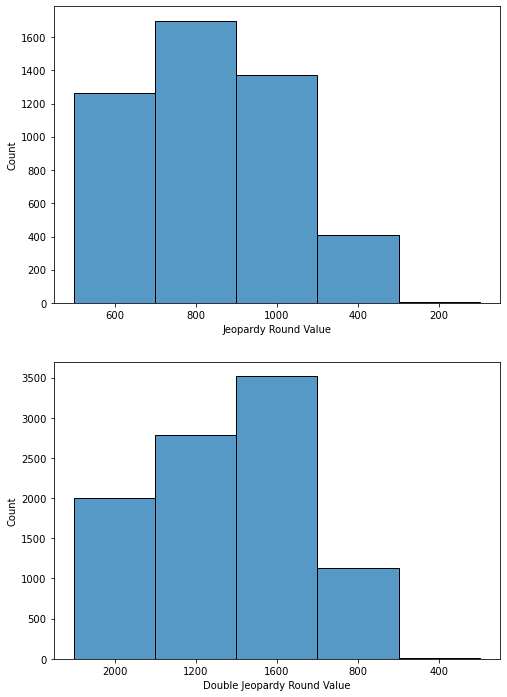

In [7]:
plt.figure(figsize = (8,12))
plt.subplot(211)
sns.histplot(dd_j.value)
plt.xlabel('Jeopardy Round Value')
plt.subplot(212)
sns.histplot(dd_dj.value)
plt.xlabel('Double Jeopardy Round Value')
plt.show()

By percentage:

In [8]:
dd_j.value.value_counts(normalize = True)

800     0.358137
1000    0.288786
600     0.265809
400     0.086636
200     0.000632
Name: value, dtype: float64

In [9]:
dd_dj.value.value_counts(normalize = True)

1600    0.372233
1200    0.294822
2000    0.211479
800     0.120195
400     0.001271
Name: value, dtype: float64

### What percentage of answers have been repeated?

In [13]:
# Note - since many answers are repeated multiple times, must use
# duplicated and not nunique, which will undercount.
repeats = df[df.answer.duplicated(keep=False)].shape[0]

In [19]:
f'{round(repeats/df.answer.shape[0],3)*100}%'

'78.2%'

In [20]:
df.answer.value_counts().nlargest(10)

Chicago       259
Australia     234
China         223
India         205
California    202
Canada        193
France        188
Japan         187
Florida       179
Alaska        174
Name: answer, dtype: int64

### What about questions?

In [21]:
clue_repeats = df[df.clue.duplicated(keep=False)].shape[0]

In [22]:
f'{round(clue_repeats/df.clue.shape[0],3)*100}%'

'0.5%'

In [23]:
df[df.clue.duplicated(keep=False)].clue.value_counts()

"I Hope I Get It"                                                                                                       5
[State outline]                                                                                                         5
[video clue]                                                                                                            5
Mount Kilimanjaro                                                                                                       4
Hubert Humphrey                                                                                                         4
                                                                                                                       ..
A coach for this Tallahassee-based college football team directed, "You guys line up alphabetically by height"          2
A light, good-hearted satire, or a "National" magazine that does satire                                                 2
He had a 1994 hit with "

In [24]:
df[df.clue == '"I Hope I Get It"']

,show_num,show_yr,show_mo,round,category,value,clue,is_DD,answer,is_stumper,level
13725,4136,2002,September,Double Jeopardy,SONGS FROM MUSICALS,2000,"""I Hope I Get It""",0,A Chorus Line,0,3
91488,5434,2008,April,Jeopardy,OPENING NUMBERS OF MUSICALS,400,"""I Hope I Get It""",0,A Chorus Line,0,1
134648,6155,2011,May,Jeopardy,MUSICALS' OPENING NUMBERS,800,"""I Hope I Get It""",0,A Chorus Line,0,2
221778,7625,2017,November,Jeopardy,MUSICALS' OPENING NUMBERS,800,"""I Hope I Get It""",0,A Chorus Line,0,2
269693,8440,2021,July,Double Jeopardy,BROADWAY MUSICALS BY OPENING NUMBERS,1200,"""I Hope I Get It""",0,A Chorus Line,0,2


### Top Answers

In [25]:
# Seperate j and dj from final jeopardy
game = df[df['round'] != 'Final Jeopardy']
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280406 entries, 0 to 285179
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   show_num    280406 non-null  int64 
 1   show_yr     280406 non-null  int64 
 2   show_mo     280406 non-null  object
 3   round       280406 non-null  object
 4   category    280406 non-null  object
 5   value       280406 non-null  object
 6   clue        280406 non-null  object
 7   is_DD       280406 non-null  int64 
 8   answer      280406 non-null  object
 9   is_stumper  280406 non-null  int64 
 10  level       280406 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 25.7+ MB


In [26]:
game.answer.value_counts().nlargest(25)

Chicago         257
Australia       228
China           219
California      202
India           199
France          186
Canada          186
Japan           185
Florida         177
Mexico          172
Spain           171
Alaska          168
Texas           167
Russia          164
Brazil          164
Italy           155
New York        154
Paris           149
Ireland         142
Germany         141
Egypt           139
South Africa    139
London          138
Hawaii          137
Greece          137
Name: answer, dtype: int64

### Top Final Jeopardy Answers

In [27]:
fj = df[df['round'] == "Final Jeopardy"]
fj.info()
fj.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 60 to 285180
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_num    4775 non-null   int64 
 1   show_yr     4775 non-null   int64 
 2   show_mo     4775 non-null   object
 3   round       4775 non-null   object
 4   category    4775 non-null   object
 5   value       4775 non-null   object
 6   clue        4775 non-null   object
 7   is_DD       4775 non-null   int64 
 8   answer      4775 non-null   object
 9   is_stumper  4775 non-null   int64 
 10  level       4775 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 447.7+ KB


,show_num,show_yr,show_mo,round,category,value,clue,is_DD,answer,is_stumper,level
60,3906,2001,September,Final Jeopardy,AUTOMOTIVE HISTORY,FJ,This Ford with a name from Native American myth was the first model to be Motor Trend Car of the Year,0,the Thunderbird,0,6
119,3907,2001,September,Final Jeopardy,NATIONAL ANTHEMS,FJ,"""Land Of Two Rivers"" is the anthem of this country whose history goes back thousands of years",0,Iraq,0,6
180,3908,2001,September,Final Jeopardy,19th CENTURY AUTHORS,FJ,"D.H. Lawrence called him ""an adventurer into the vaults and...horrible underground passages of the human soul""",0,Edgar Allan Poe,0,6
241,3909,2001,September,Final Jeopardy,HISTORIC NAMES,FJ,"In 1978, Congress restored U.S. citizenship to this man seen here",0,Jefferson Davis,0,6
301,3910,2001,September,Final Jeopardy,ZOOLOGY,FJ,"Animal species that's the subject of the longest consecutive study of any group of wild animals, 40 years",0,chimpanzees,0,6


In [28]:
fj.answer.value_counts().nlargest(20)

Edgar Allan Poe       9
Ernest Hemingway      8
Benjamin Franklin     8
the Netherlands       7
Canada                7
Gone with the Wind    7
New York              7
Richard Nixon         7
Maryland              7
Hawaii                7
Mark Twain            7
the Philippines       6
Dracula               6
Walt Whitman          6
Frankenstein          6
Australia             6
Waiting for Godot     6
Abraham Lincoln       6
India                 6
Alaska                6
Name: answer, dtype: int64

### Top categories over the full 20 years

In [29]:
df.category.value_counts().nlargest(20)

BEFORE & AFTER             525
AMERICAN HISTORY           424
POTPOURRI                  423
SCIENCE                    412
WORD ORIGINS               380
RHYME TIME                 298
NONFICTION                 293
POP CULTURE                277
STUPID ANSWERS             275
AMERICANA                  273
BODIES OF WATER            267
LITERATURE                 266
HODGEPODGE                 259
HISTORY                    253
CLASSICAL MUSIC            252
TRANSPORTATION             244
3-LETTER WORDS             244
IN THE DICTIONARY          244
ART & ARTISTS              243
COLLEGES & UNIVERSITIES    239
Name: category, dtype: int64

### Top categories over the past 5 years

In [30]:
df5 = df[df.show_yr > 2016]
df5.category.value_counts().nlargest(20)

AMERICAN HISTORY    180
SCIENCE             154
POTPOURRI           130
HISTORY             130
HODGEPODGE          100
AROUND THE WORLD    100
WORD ORIGINS         98
LITERATURE           91
BEFORE & AFTER       90
BOOKS & AUTHORS      80
TRANSPORTATION       79
WORLD HISTORY        79
GEOGRAPHY            77
BODIES OF WATER      75
EUROPEAN HISTORY     74
NONFICTION           72
U.S. GEOGRAPHY       71
RHYME TIME           70
WORLD GEOGRAPHY      67
CLASSICAL MUSIC      62
Name: category, dtype: int64

### Triple Stumpers

In [33]:
ts = df[df.is_stumper == 1]
ts.info()
ts.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39782 entries, 15 to 285167
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_num    39782 non-null  int64 
 1   show_yr     39782 non-null  int64 
 2   show_mo     39782 non-null  object
 3   round       39782 non-null  object
 4   category    39782 non-null  object
 5   value       39782 non-null  object
 6   clue        39782 non-null  object
 7   is_DD       39782 non-null  int64 
 8   answer      39782 non-null  object
 9   is_stumper  39782 non-null  int64 
 10  level       39782 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.6+ MB


,show_num,show_yr,show_mo,round,category,value,clue,is_DD,answer,is_stumper,level
99178,5561,2008,November,Jeopardy,YOU'RE SUCH AN ANIMAL!,1000,"Pictured here, this husky-like sled dog is named for the Inuit tribe who developed the breed",0,Malamute,1,5
11955,4107,2002,June,Double Jeopardy,SOMETHING'S FISHY,1600,"Until one was caught in 1938, it was thought that this fish had been extinct for more than 70 million years",0,the coelacanth,1,5
130829,6091,2011,February,Double Jeopardy,TV CARTOON BY CHARACTERS,2000,"Killface,Awesome X,Grace Ryan",0,Frisky Dingo,1,5
187624,7046,2015,April,Jeopardy,COUNTRIES IN 3 WORDS,1000,Formerly Gilbert Islands,0,Kiribati,1,5
14279,4145,2002,September,Double Jeopardy,"""J"" WALKING",2000,Christian monk & translator Eusebius Hieronymus is better known as this saint,0,Saint Jerome,1,5


Have questions been getting more difficult?


<AxesSubplot:xlabel='show_yr', ylabel='Count'>

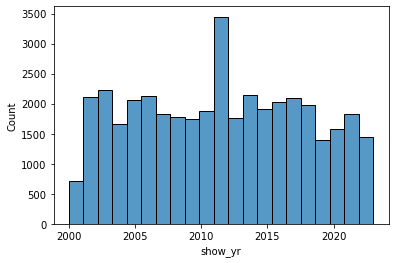

In [34]:
sns.histplot(data = ts, x = 'show_yr', bins = 21, binrange = (2000,2023))

In [37]:
ts['value'].value_counts()

2000    8713
800     6920
1000    6398
1600    5630
1200    4125
400     3819
600     3012
200     1165
Name: value, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

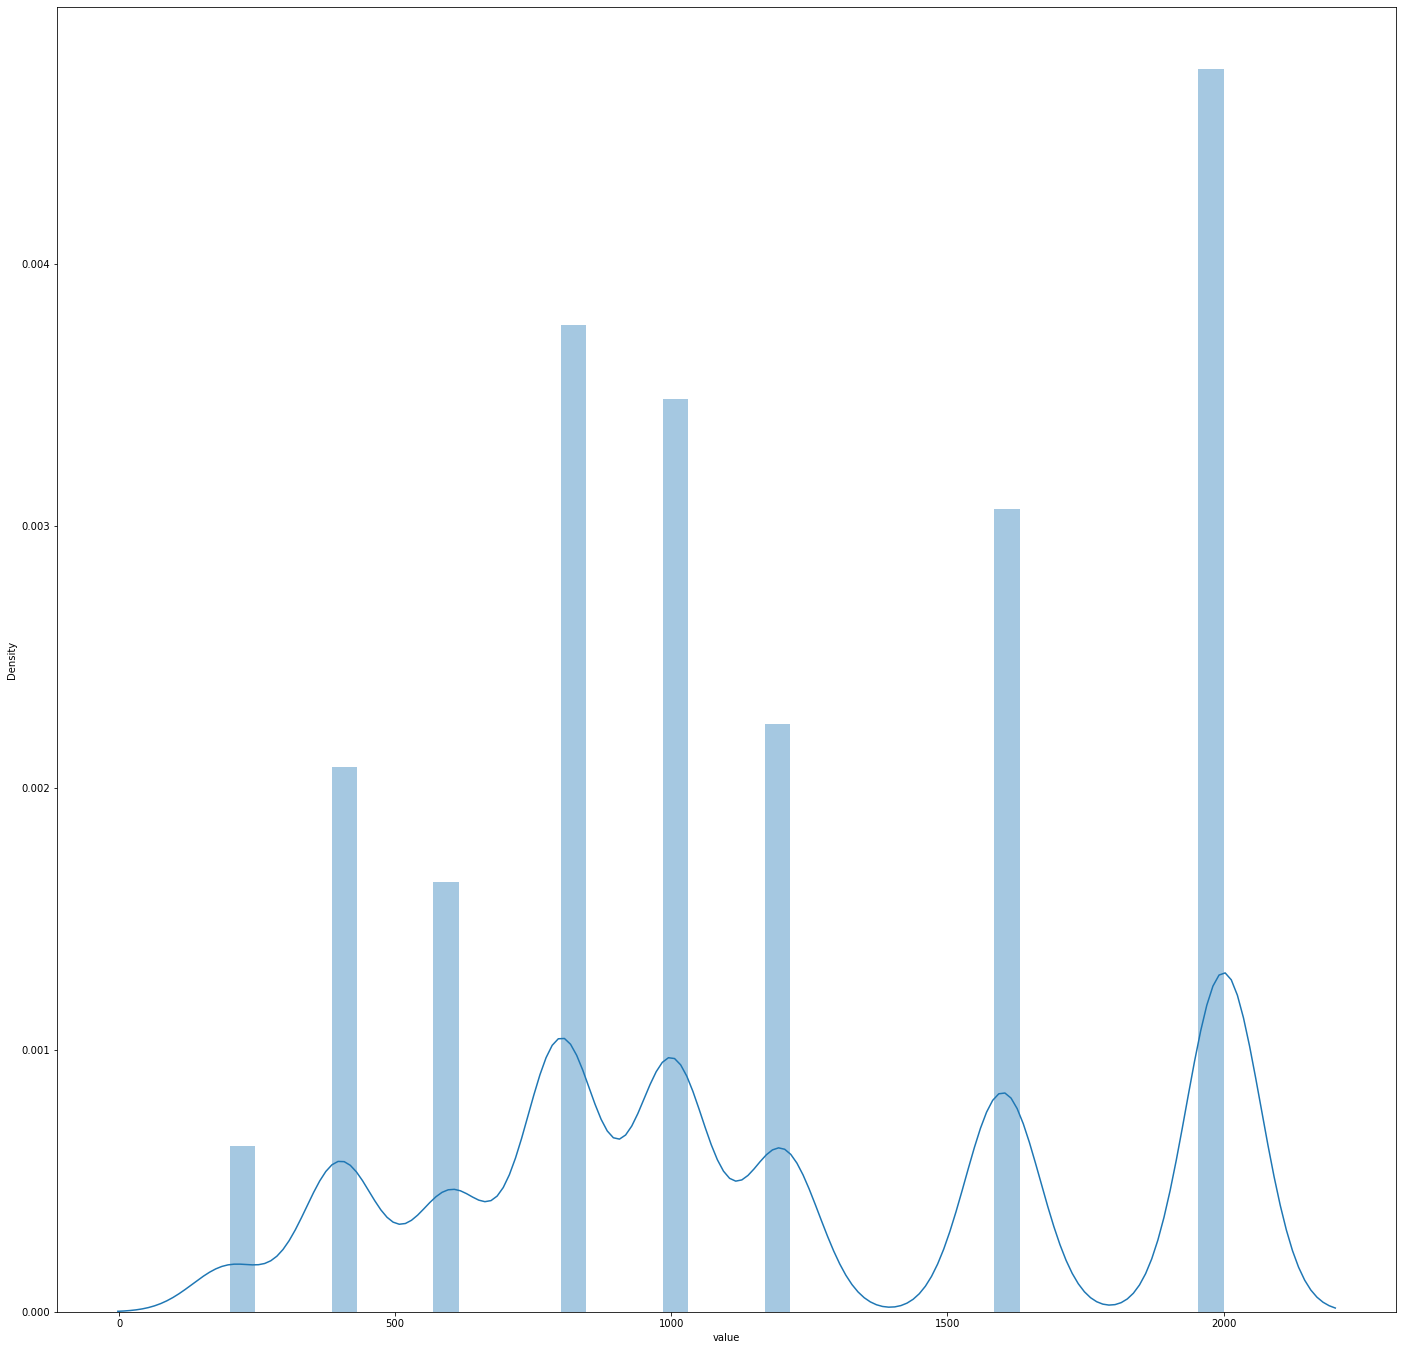

In [39]:
plt.figure(figsize = (24,24))
sns.distplot(ts['value'])

### Else...

In [32]:
df[df.category.str.contains('.POET.')].answer.value_counts().nlargest(20)

Elizabeth Barrett Browning    13
Lord Byron                    11
Emily Dickinson               10
Robert Frost                  10
Walt Whitman                   7
Edna St. Vincent Millay        7
Allen Ginsberg                 6
Langston Hughes                6
Keats                          6
(Walt) Whitman                 6
(Edgar Allan) Poe              6
Tennyson                       6
Dylan Thomas                   6
(Rabbie) Burns                 5
Shelley                        5
Dante                          5
(Robert) Frost                 5
Wordsworth                     5
Annabel Lee                    5
John Donne                     5
Name: answer, dtype: int64